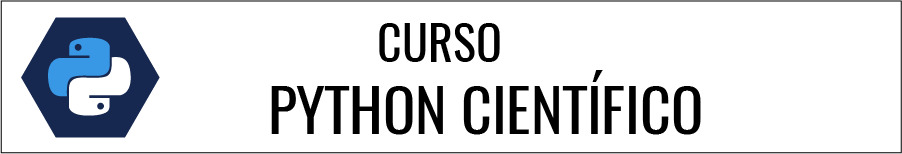

# Resolución de Ecuaciones Diferenciales Ordinarias (EDO)

Una ecuación diferencial ordinaria (comúnmente abreviada "EDO") es la ecuación diferencial que relaciona una función desconocida de una variable independiente con sus derivadas.  
Es decir, una sola variable independiente (a diferencia de las ecuaciones diferenciales parciales que involucran derivadas parciales de varias variables), y una o más de sus derivadas respecto de tal variable. 

Suponemos que tenemos un problema de valor inicial bien planteado, y contamos con una ecuación de la forma:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(t, \mathbf{y}\right)$$ con  $$y(a)=\alpha$$

a resolver en el intervalo $$ a<= t <= b$$ 

Para integrar una EDOs vamos a usar la función `solve_ivp` del paquete `integrate`, que permite integrar sistemas del mencionado, con condiciones iniciales $\mathbf{y}(\mathbf{t_{in}}) = \mathbf{y_0}$ con $t_{in}$ el tiempo inicial de estudio del sistema.

<div class="alert alert-warning" role="alert">
Una versión anterior a esta es el método <b>scipy.integrate.odeint</b>, el cual fue reemplazdo por <b>solve_ivp</b>.
</div>

Existen una serie de métodos algunos muy antiguos y robustos que aún siguen siendo útiles en cálculos científicos e ingenieriles. El método de Euler es el más simple claro e intuitivo que tiene un valor didáctico.
No aspiramos a encontrar una solución analítica de $y(t)$ sino a tener una tabla de dos columnas por lo menos, una para $t$ y otra para $y(t)$. También podemos calcular los errores en función del tiempo y agregar una columna para los valores exactos si los tenemos en algún caso particular. En la vida real intentamos resolver problemas cuyas soluciones exactas no conocemos.  
La columna de tiempo tendrá en general valores equiespaciado,  aunque a veces se pueden utilizar métodos que van adaptando el valor de *h* dinámicamente al ejecutar el algoritmo, acá no usaremos esos métodos.

Definimos un conjunto acotado de puntos y vamos a conocer cuanto vale la aproximación a la función en N puntos que llamamos nodos, que puede ser un número grande o chico según el problema de interés, equiespaciados a intervalos h. 

Para el método de Euler que es uno de los más antiguos y simples vamos a tomar N intervalos por medio de N+1 nodos equiespaciados de la forma: $$t_i = a +i*h$$ para i entero que toma 0,1, 2,... N valores.

 Donde $$h=(b-a)/N$$ es el paso temporal 


Para deducir la fórmula de Euler se usa el Teorema de Taylor. Suponemos que la solución y(t) tiene derivada primera y segunda y que ambas son continuas en el intevalo [a,b], para calcular $y(t_i+1)$ hacemos el desarrollo de Taylor de grado 1 alrededor de $t_i$ y se utiliza para expresar la solución exacta en el próximo nodo:


$$ y(t_{i+1}) = y(t_i)+ (t_{i+1} - t_i) * y'(t_i)+ (t_{i+1} - t_i)^2/2 *y''(c) $$

$$ y(t_{i+1}) = y(t_i)+h * f(t_i) +h^2/2 y''(c)$$

Vamos a llamar $ w_i = f(t_i,y(t_i)) = f(a+i*h,y(a+i*h))$a las aproximaciones a las soluciones exactas con $w_0= \alpha = y(a) $ y estimamos el valor de y(a+h):


$$ y(a+h) = w_1 = y(a) + h * f(a,y(a))$$

$$        = w_0 + h*f(a,w_0) $$

Aqui t es la 1-D independent variable independiente (tiempo), y(t) es una función-vector N-D(state), y f(t, y) es una función-vector N-D que determina las ecuaciones diferenciales. El objetivo es encontrar y(t) que satisfaga aproximadamente las ecuaciones diferenciales, dado un valor inicial y(t0)=y0.

Pagina del manual:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
from scipy.integrate import solve_ivp

<div class="alert alert-danger" role="alert">
    <b>¡Importante!</b>: La función del sistema recibe como primer argumento el instante $t$ (un escalar) y como segundo argumento $\mathbf{y}$ (un array).
</div>

Vamos a integrar primero una EDO elemental, cuya solución ya conocemos. 
#### Ejemplo 
*Una cantidad está sujeta a un decaimiento* si disminuye a una tasa proporcional con respecto a su valor actual.  
Simbólicamente, este proceso puede ser expresado por la siguiente ecuación diferencial, donde N es la cantidad y λ (lambda) es una tasa positiva llamada constante de decaimiento, en este caso representaremos a $N$ por $y$, esto es:

$$ \lambda \cdot y + y'= 0$$
$$y' = -\lambda \cdot y$$

$$f(y, t) = \frac{dy}{dt} = -\lambda \cdot y$$

definamos esta funcion $f(y, t)$

In [98]:
λ = 2.0   # Constante de decaimiento
def f(t, y):  # tener presente el nombre de la función 'f'
    f = np.array([-λ * y])
    return f

Definamos las condiciones iniciales:

In [99]:
y0 = np.array([10])   # Arreglo con y0 igual a 10 para tini(cond inicial)
print('y0 :', y0)

tini = 0   # Este es el intervalo de trabajo, tiempo inicial
tfin = 5   # tiempo final

y0 : [10]


<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Atención Unidades!</h4>
  <p>Las unidades utilizadas tanto para la variables como los parámetros de la función, debes ser compatibles.
      En este caso, $\lambda$ debe ser la constante de decaimiento, considerando las unidades del tiempo.
    </p>
  <hr>
    <p class="mb-0">Por ejemplo <i>segundos</i>.</p>
</div>

Integramos y representamos la solución:

In [100]:
sol = solve_ivp(f, (tini, tfin), y0)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.07578734, 0.53973378, 0.97766198, 1.41721513,
       1.8567034 , 2.29628294, 2.73606647, 3.17634056, 3.61778717,
       4.06200998, 4.51266579, 4.97756597, 5.        ])
 t_events: None
        y: array([[1.00000000e+01, 8.59353700e+00, 3.40019118e+00, 1.41686375e+00,
        5.88500654e-01, 2.44467954e-01, 1.01535514e-01, 4.21538764e-02,
        1.74836728e-02, 7.23458281e-03, 2.97709678e-03, 1.20951025e-03,
        4.77658137e-04, 4.56700227e-04]])
 y_events: None


--------------------------------------------------------------
**Returns**

    Bunch object with the following fields defined:
    tndarray, shape (n_points,)

        Time points.
    yndarray, shape (n, n_points)

        Values of the solution at t.
    solOdeSolution or None

        Found solution as OdeSolution instance; None if dense_output was set to False.
    t_eventslist of ndarray or None

        Contains for each event type a list of arrays at which an event of that type event was detected. None if events was None.
    y_eventslist of ndarray or None

        For each value of t_events, the corresponding value of the solution. None if events was None.
        
    nfevint
        Number of evaluations of the right-hand side.

    njevint
        Number of evaluations of the Jacobian.
        
    nluint
        Number of LU decompositions.
        
    statusint
        Reason for algorithm termination:
                -1: Integration step failed.

                0: The solver successfully reached the end of tspan.

                1: A termination event occurred.

    messagestring
        Human-readable description of the termination reason.
        
    successbool
        True if the solver reached the interval end or a termination event occurred (status >= 0).

----------------------------------------------------------------------------
veamos la solución

In [101]:
print(sol.t)
print('.............................................................')
print(sol.y)

[0.         0.07578734 0.53973378 0.97766198 1.41721513 1.8567034
 2.29628294 2.73606647 3.17634056 3.61778717 4.06200998 4.51266579
 4.97756597 5.        ]
.............................................................
[[1.00000000e+01 8.59353700e+00 3.40019118e+00 1.41686375e+00
  5.88500654e-01 2.44467954e-01 1.01535514e-01 4.21538764e-02
  1.74836728e-02 7.23458281e-03 2.97709678e-03 1.20951025e-03
  4.77658137e-04 4.56700227e-04]]


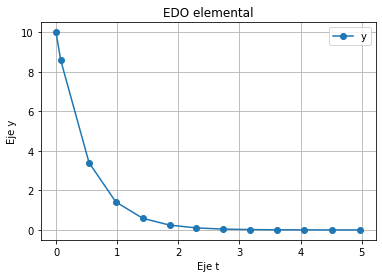

In [102]:
plt.plot(sol.t[0:-1], sol.y[0,0:-1], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y'], loc = 0)

la pregunta que surge es ¿cómo se han seleccionado los puntos en los que se calcula la solución?  
El solver los ha calculado por nosotros.  
Si queremos tener control sobre estos puntos, podemos pasar de manera explícita el vector de tiempos:

In [105]:
time = np.linspace(tini, tfin, 30)   # Definimos la variable tiempo

In [106]:
sol_2 = solve_ivp(f, (tini, tfin), y0, t_eval = time)

In [107]:
print(sol_2.t[ 3],sol_2.y[0, 3])

0.5172413793103449 3.556450981906865


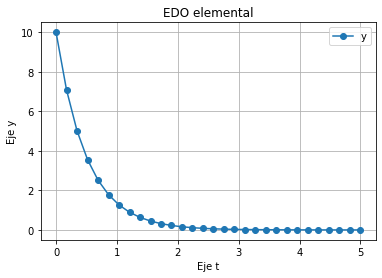

In [108]:
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y'], loc = 0)

Probemos a pintar las dos soluciones anteriores, una encima de la otra:

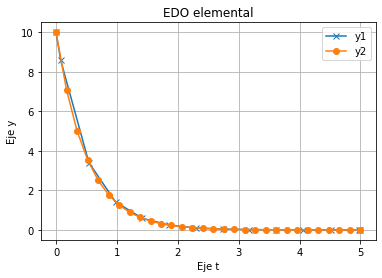

In [109]:
plt.plot(sol.t, sol.y[0, :], 'x-')
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y1', 'y2'], loc = 0)

Podemos observar que a pesar de que en la primera se han usado muchos menos puntos, aquellos en los que se ha calculado la solución coinciden con el segundo resultado. Esto se debe a que, en realidad, el solver siempre da los pasos que considere necesarios para calcular la solución, pero sólo guarda los que nosotros le indicamos. Esto lo podemos ver del siguiente modo:

In [110]:
print(f"Evaluaciones de funciones en sol 1: {sol.nfev}")
print(f"Evaluaciones de funciones en sol 2: {sol_2.nfev}")

Evaluaciones de funciones en sol 1: 80
Evaluaciones de funciones en sol 2: 80


Para ello podemos usar la salida densa `dense_output = True` para obtener la solución en un punto cualquiera:

In [113]:
sol_3 = solve_ivp(f, (tini, tfin), y0, dense_output = True)
print(f"Evaluaciones de funciones en sol 2: {sol_3.nfev}")

Evaluaciones de funciones en sol 2: 80


In [114]:
print(sol_3.y)

[[1.00000000e+01 8.59353700e+00 3.40019118e+00 1.41686375e+00
  5.88500654e-01 2.44467954e-01 1.01535514e-01 4.21538764e-02
  1.74836728e-02 7.23458281e-03 2.97709678e-03 1.20951025e-03
  4.77658137e-04 4.56700227e-04]]


In [117]:
t = np.linspace(tini, tfin, 100)
y = sol_3.sol(t)

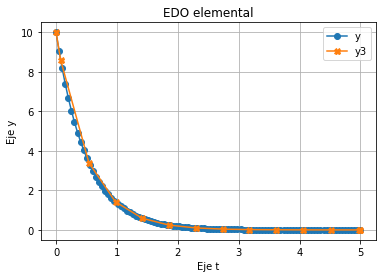

In [116]:
plt.plot(t, y[0, :], 'o-')
plt.plot(sol_3.t, sol_3.y[0, :], 'X-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y','y3'], loc = 0)

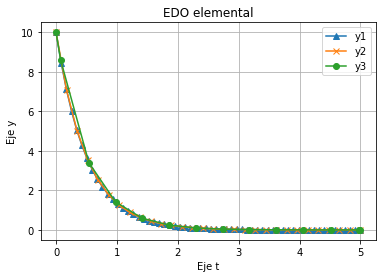

In [75]:
plt.plot(t, y[0, :], '^-')
plt.plot(sol_2.t, sol_2.y[0, :], 'x-')
plt.plot(sol.t, sol.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y1','y2','y3'], loc = 0)

### Utilizando otros métodos

scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)

methodstring or OdeSolver, optional

    Integration method to use:

            ‘RK45’ (default): Explicit Runge-Kutta method of order 5(4) [1]. The error is controlled assuming accuracy of the fourth-order method, but steps are taken using the fifth-order accurate formula (local extrapolation is done). A quartic interpolation polynomial is used for the dense output [2]. Can be applied in the complex domain.

            ‘RK23’: Explicit Runge-Kutta method of order 3(2) [3]. The error is controlled assuming accuracy of the second-order method, but steps are taken using the third-order accurate formula (local extrapolation is done). A cubic Hermite polynomial is used for the dense output. Can be applied in the complex domain.

            ‘DOP853’: Explicit Runge-Kutta method of order 8 [13]. Python implementation of the “DOP853” algorithm originally written in Fortran [14]. A 7-th order interpolation polynomial accurate to 7-th order is used for the dense output. Can be applied in the complex domain.

            ‘Radau’: Implicit Runge-Kutta method of the Radau IIA family of order 5 [4]. The error is controlled with a third-order accurate embedded formula. A cubic polynomial which satisfies the collocation conditions is used for the dense output.

            ‘BDF’: Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation [5]. The implementation follows the one described in [6]. A quasi-constant step scheme is used and accuracy is enhanced using the NDF modification. Can be applied in the complex domain.

            ‘LSODA’: Adams/BDF method with automatic stiffness detection and switching [7], [8]. This is a wrapper of the Fortran solver from ODEPACK.



In [108]:
λ = 2.0   # Constante de decaimiento
def f(t, y):  # tener presente el nombre de la función 'f'
    f = np.array([-λ * y])
    return f

In [123]:
y0 = np.array([10])   # Hacemos un arreglo con un dato igual a 10

tini = 0   # Este es el intervalo de trabajo, tiempo inicial
tfin = 5   # tiempo final
time = np.linspace(tini, tfin, 40)

In [124]:
meth_A = 'RK23'    # Explicit Runge-Kutta method of order 3(2)
meth_B = 'RK45'   # (default):Explicit Runge-Kutta method of order 5(4)
meth_C = 'DOP853'  # Explicit Runge-Kutta method of order 8 [13]

sol_4 = solve_ivp(f, (tini, tfin), y0, method = meth_A, t_eval = time, )
sol_5 = solve_ivp(f, (tini, tfin), y0, method = meth_B, t_eval = time, )
sol_6 = solve_ivp(f, (tini, tfin), y0, method = meth_C, t_eval = time, )

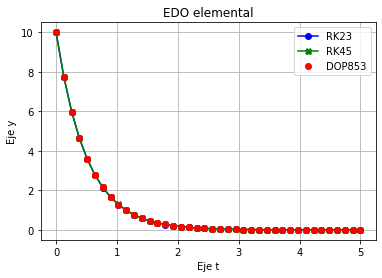

In [125]:
#plt.plot(t, y[0, :], 'o-')
plt.plot(sol_4.t, sol_4.y[0, :], 'ob-')
plt.plot(sol_5.t, sol_5.y[0, :], 'Xg-')
plt.plot(sol_6.t, sol_6.y[0, :], 'or')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend([meth_A,meth_B,meth_C], loc = 0)

## Ecuaciones diferenciales de orden superior 

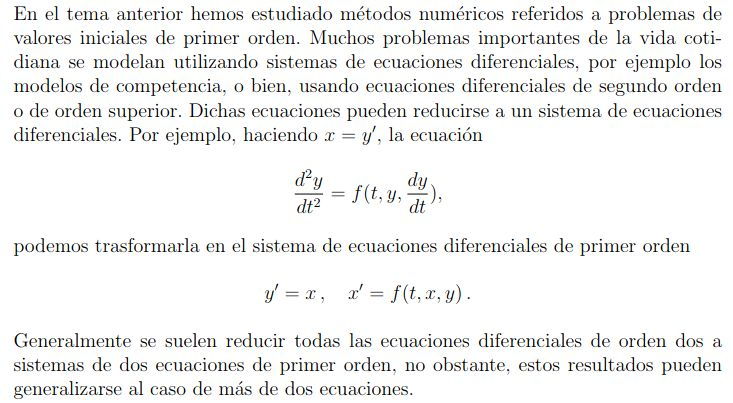

El sistema debe escribirse en términos de primer orden. Sólo ecuaciones diferenciales. Para resolver un sistema con derivadas de orden superior, primero escribirá un sistema en cascada de ecuaciones de primer orden y luego utilícelas en su función diferencial. Para ejemplo, suponga que tiene un sistema caracterizado por sacudidas constantes: 

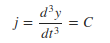

Para representar la ecuación de tercer orden hay que escribir tres derivadas de primer orden:

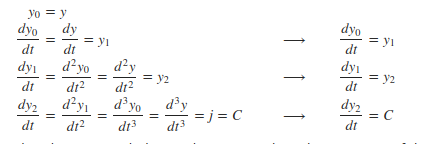

Observe cómo las derivadas caen en cascada con la tercera derivada constante, y ahora las EDOs se puede escribir como un conjunto de tres ecuaciones de primer orden. Tenga en cuenta que en este sistema, $y_0$ representa la posición, $y_1$ representa la velocidad y y $_2$ representa la aceleración.  
Este tipo de sistema en cascada aparece a menudo cuando se modela ecuaciones de movimiento. 

Tendremos que acordarnos ahora cómo reducir las ecuaciones de orden superior.  
De nuevo, vamos a probar con un ejemplo académico:

$$y + y'' = 0$$
$$y'' = -y $$
definimos $\mathbf{y} \leftarrow \pmatrix{y \\ y'}$  
con  $\mathbf{y} = \mathbf{y_0}$  
y con $\mathbf{y'} = \mathbf{y_1}$  


$$\frac{d\mathbf{y}}{dt} = \mathbf{f}(\mathbf{y})$$

$$ \frac{d\mathbf{y}}{dt} =  \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$
$$
\mathbf{y'} = \pmatrix{y' \\ -y}
$$
esto es
$$
\mathbf{y'} = \pmatrix{y_1 \\ -y_0}
$$


In [4]:
def f(t, y):
    f = np.array([y[1], -y[0]])
    return f

In [5]:
tini = 0
tfin = 10

t = np.linspace(tini, tfin)   # por default son 50 pasos
y0 = np.array([1.0, 0.0]) # un arreglo de dos elementos

In [6]:
print(y0)

[1. 0.]


In [7]:
meth_A = 'RK23'    # (default): Explicit Runge-Kutta method of order 3(2)
meth_B = 'RK45'   # Explicit Runge-Kutta method of order 5(4)
meth_C = 'DOP853'  # Explicit Runge-Kutta method of order 8 [13]

In [8]:
sol_2 = solve_ivp(f, (tini, tfin), y0, t_eval = t)
sol_4 = solve_ivp(f, (tini, tfin), y0, method = meth_B, t_eval = t, )
sol_5 = solve_ivp(f, (tini, tfin), y0, method = meth_C, t_eval = t, )

Text(0.5, 1.0, 'EDO de segundo orden')

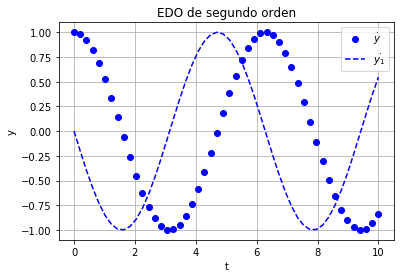

In [16]:
plt.plot(t, sol_2.y[0, :], 'ob' , label='$\dot{y}$')
plt.plot(t, sol_2.y[1, :], '--b', label='$\dot{y_1}$')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.title('EDO de segundo orden')

Text(0.5, 1.0, 'EDO de segundo orden')

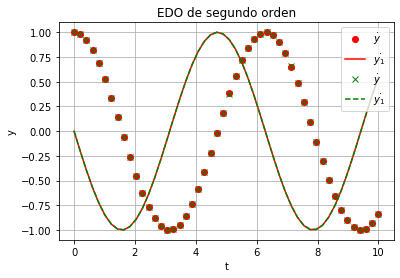

In [19]:
plt.plot(sol_4.t, sol_4.y[0, :], 'or', label='$\dot{y}$')
plt.plot(sol_4.t, sol_4.y[1, :], '-r', label='$\dot{y_1}$')
plt.plot(sol_5.t, sol_5.y[0, :], 'xg', label='$\dot{y}$')
plt.plot(sol_5.t, sol_5.y[1, :], '--g',label='$\dot{y_1}$')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.title('EDO de segundo orden')

### Otro Ejemplo

Decaimiento exponencial básica que muestra los puntos de tiempo elegidos automáticamente.

In [258]:
# from scipy.integrate import solve_ivp
def exponential_decay(t, y): 
    λ = 0.5
    return -λ * y

In [263]:
intervalo = [0, 30]

sol = solve_ivp(exponential_decay, intervalo, [2])
print(sol.y[0])

[2.00000000e+00 1.88835583e+00 1.06324380e+00 4.33165311e-01
 1.80149050e-01 7.48084146e-02 3.10501862e-02 1.28706622e-02
 5.31822949e-03 2.18125645e-03 8.79557875e-04 3.41885460e-04
 1.23677234e-04 3.95256478e-05 1.04501705e-05 2.14241877e-06
 6.61382161e-07]


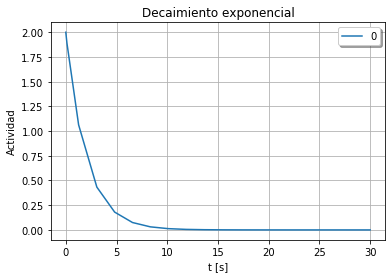

In [264]:
plt.plot(sol.t, sol.y[0])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['0'], shadow=True)
plt.title('Decaimiento exponencial')
plt.grid()
plt.show()

Podemos calcular tres ecuaciones (o más) a la vez, con distintas actividades iniciales

In [265]:
sol = solve_ivp(exponential_decay, intervalo, [2, 4, 8])

In [267]:
print(sol.y[0])
print(sol.y[1])
print(sol.y[2])

[2.00000000e+00 1.88836035e+00 1.06327177e+00 4.33193118e-01
 1.80172534e-01 7.48304534e-02 3.10715779e-02 1.28917348e-02
 5.33904549e-03 2.20167438e-03 8.99146274e-04 3.59729261e-04
 1.38307144e-04 4.95564437e-05 1.57924962e-05 4.19606550e-06
 8.68633574e-07 6.56828278e-07]
[4.00000000e+00 3.77672070e+00 2.12654355e+00 8.66386236e-01
 3.60345068e-01 1.49660907e-01 6.21431557e-02 2.57834695e-02
 1.06780910e-02 4.40334876e-03 1.79829255e-03 7.19458522e-04
 2.76614289e-04 9.91128874e-05 3.15849924e-05 8.39213101e-06
 1.73726715e-06 1.31365656e-06]
[8.00000000e+00 7.55344140e+00 4.25308709e+00 1.73277247e+00
 7.20690135e-01 2.99321814e-01 1.24286311e-01 5.15669390e-02
 2.13561820e-02 8.80669753e-03 3.59658510e-03 1.43891704e-03
 5.53228577e-04 1.98225775e-04 6.31699849e-05 1.67842620e-05
 3.47453430e-06 2.62731311e-06]


Grafiquemos

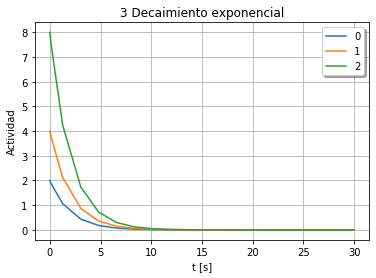

In [63]:
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['0', '1', '2'], shadow=True)
plt.title('3 Decaimiento exponencial')
plt.grid()
plt.show()

Especificando puntos densos.

In [64]:
sol = solve_ivp(exponential_decay, intervalo, [2], dense_output = True)

In [65]:
t = np.linspace(0, 15, 300)
z = sol.sol(t)

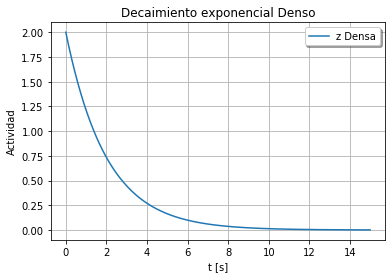

In [66]:
plt.plot(t, z[0])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['z Densa'], shadow=True)
plt.title('Decaimiento exponencial Denso')
plt.grid()
plt.show()

Especificando puntos donde se desea la solución.

In [148]:
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8], t_eval=[0, 1, 2, 4, 10])
print(sol.t)
print(sol.y)

[ 0  1  2  4 10]
[[2.         1.21305369 0.73534021 0.27069123 0.01350781]
 [4.         2.42610739 1.47068043 0.54138247 0.02701561]
 [8.         4.85221478 2.94136085 1.08276494 0.05403123]]


## Disparo de cañón 

El cañón dispara hacia arriba con un evento final al impactar.  
Definimos y[0] es la posición inicial e y[1] es la velocidad inicial.  
El proyectil comienza en la posición 0 con velocidad +200.

In [245]:
g = 9.8
def disparo(t, y): 
    return [y[1], -1.0*g]

sol = solve_ivp(disparo, [0, 100], [-200, 200], dense_output = True)
#y0 = np.array([0.0, 200.0])

In [246]:
t = np.linspace(0, 50, 300)
z = sol.sol(t)

In [247]:
#print('y0 :', y[0])

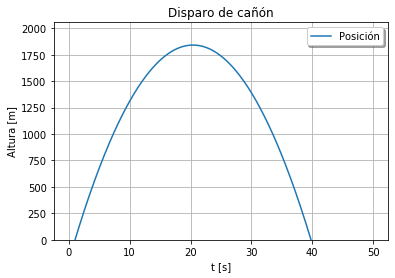

In [248]:
plt.plot(t, z[0])
plt.xlabel('t [s]')
plt.ylabel('Altura [m]')
plt.ylim(0,)
plt.legend(['Posición'], shadow=True)
plt.title('Disparo de cañón')
plt.grid()
plt.show()

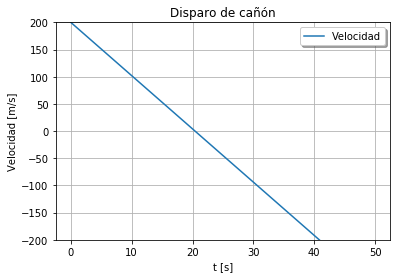

In [252]:
plt.plot(t, z[1])
plt.xlabel('t [s]')
plt.ylabel('Velocidad [m/s]')
plt.ylim(-200,200)
plt.legend(['Velocidad'], shadow=True)
plt.title('Disparo de cañón')
plt.grid()
plt.show()

## Ecuaciones de Lotka-Volterra  
Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones predador-presa o presa-predador, son un par de ecuaciones diferenciales de primer orden no lineales que se usan para describir dinámicas de sistemas biológicos en el que dos especies interactúan, una como presa y otra como depredador.  
Las ecuaciones fueron propuestas de forma independiente por Alfred J. Lotka en 1925 y Vito Volterra en 1926.  Tales ecuaciones se definen como:

$${\displaystyle {\frac {dx}{dt}}=x(\alpha -\beta y)}$$

$${\displaystyle {\frac {dy}{dt}}=-y(\gamma -\delta x)}$$

donde:

*y* es el número de algún predador (por ejemplo, un lobo);  
*x* es el número de sus presas (por ejemplo, conejos);  
*dy/dt* y *dx/dt* representa el crecimiento de las dos poblaciones en el tiempo;  
*t* representa el tiempo; y  
*α, β, γ y δ* son parámetros (positivos) que representan las interacciones de las dos especies. En las ecuaciones, por razones de simpleza, las llamaremos *a, b, c, d*, respectivamente.

In [240]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    ec1 =  x * (a - b * y) # a*x - b*x*y
    ec2 = -y * (c - d * x) # -c*y + d*x*y
    return [ec1, ec2]
#    return [x*(a - b*y), -y*(c + d*x)]

In [241]:
# pass in the parameter values a=1.5, b=1, c=3 and d=1 with the args argument.
a, b, c, d = 1.5, 1.0, 3.0, 1.0
conejos = 10
zorros = 5
tini = 0
tfin = 20
sol = solve_ivp(lotkavolterra, [tini, tfin], [conejos, zorros], args=(a, b, c, d), dense_output=True)

In [242]:
t = np.linspace(tini, tfin, 300)
z = sol.sol(t)

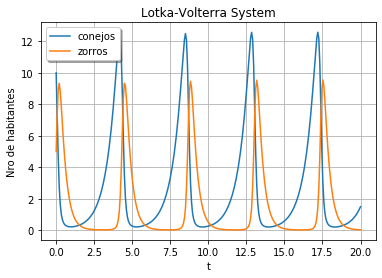

In [243]:
plt.plot(t, z.T)
plt.xlabel('t')
plt.ylabel('Nro de habitantes')
plt.legend(['conejos', 'zorros'], shadow=True)
plt.title('Lotka-Volterra System')
plt.grid(True)
plt.show()

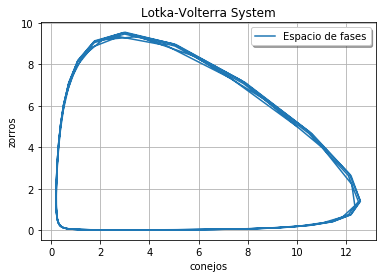

In [244]:
plt.plot(z[0], z[1])
plt.xlabel('conejos')
plt.ylabel('zorros')
plt.legend(['Espacio de fases'], shadow=True)
plt.title('Lotka-Volterra System')
plt.grid(True)
plt.show()

## Ecuación de Bateman
El decaimiento radiactivo se rige por el siguiente sistema de ecuaciones diferenciales, para el caso de dos isotipos ligados genealógicamente como progenitor/hija

Isótopo madre $$\frac{dN_a(t)}{dt} = - \lambda_a N_a(t)$$   
Isótopo hija $$\frac{dN_b(t)}{dt} =  \lambda_a N_a(t) -  \lambda_b N_b(t)$$ 

In [126]:
# ln(2) = 0.69314718056
def bateman(t, z, a, b):
    x, y = z
    ec1 =  - x * a
    ec2 =  - y * b + x * a
    return [ec1, ec2]

In [127]:
Ta = 500 # Período medio del isótopo madre en segundos
Tb = 300 # Período medio del isótopo hija en segundos

# ln(2) = 0.69314718056
a = 0.69314718056 / Ta # Cálculo de la Constante de Decaimiento Radiactivo
b = 0.69314718056 / Tb # Cálculo de la Constante de Decaimiento Radiactivo

Aa = 200 # Actividad inicial del isótopo madre
Ab = 0 # Actividad inicial del isótopo hija
tini = 0
tfin = 7 * Ta
bat = solve_ivp(bateman, [tini, tfin], [Aa, Ab], args=(a, b), dense_output=True)

In [128]:
t = np.linspace(tini, tfin, 300)
z = bat.sol(t)

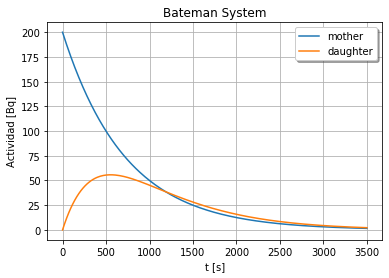

In [129]:
plt.plot(t, z.T)
plt.xlabel('t [s]')
plt.ylabel('Actividad [Bq]')
plt.legend(['mother', 'daughter'], shadow=True)
plt.title('Bateman System')
plt.grid()
plt.show()

### Atractor de Lorenz

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963. Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de vortices de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.

Para ciertos valores de los parámetros a, b, c, el sistema exhibe un comportamiento caótico y muestra lo que actualmente se llama un atractor extraño; esto fue probado por Warwick Tucker en 2002.  

El atractor extraño en este caso es un fractal de dimensión de Hausdorff entre 2 y 3. Grassberger (1983) ha estimado la dimensión de Hausdorff en 2,06 ± 0,01 y la dimensión de correlación en 2,05 ± 0,01.

El sistema aparece en láseres, en generadores eléctricos y en determinadas ruedas de agua.

$$\frac{dx}{dt} = a(y-x) $$ 
    
$$\frac{dy}{dt} = x(b-z)-y $$ 

$$\frac{dz}{dt} = xy-cz $$

donde $a$ es llamado el número de **Prandtl** y $b$ se llama el número de **Rayleigh**.

$a , b , c \gt 0 $, pero es usualmente $a = 10$, $c = 8 / 3$ y b es variado.  
El sistema exhibe un comportamiento caótico para $b = 28$ pero muestra órbitas periódicas para otros valores de $b$; por ejemplo, con $b = 99$, se convierte en un nudo tórico llamado T(3;2).

La forma de mariposa del atractor de Lorenz puede haber inspirado el nombre del *efecto mariposa* en la teoría del caos. 

https://es.wikipedia.org/wiki/Atractor_de_Lorenz

$$\frac{dx}{dt} = a(y-x) $$ 
    
$$\frac{dy}{dt} = x(b-z)-y $$ 

$$\frac{dz}{dt} = xy-cz $$


In [130]:
from mpl_toolkits.mplot3d import Axes3D 

In [131]:
def lorenz(t, w, a, b, c):
    x, y, z = w
    ec1 = a * (y - x)
    ec2 = x * (b - z) - y
    ec3 = x * y - c * z
    return [ec1, ec2, ec3]

In [132]:
a = 10.0
b = 99.0 # 28.0 # 99
c = 8.0/3.0
tini, tfin = 0.0, 100.0
#(0., 1., 1.05)
y0 = [1., 1., 1.05]

In [133]:
lor = solve_ivp(lorenz, [tini, tfin], y0, args=(a, b, c), dense_output=True)

In [134]:
t = np.linspace(tini, tfin, 100000)
k = lor.sol(t)

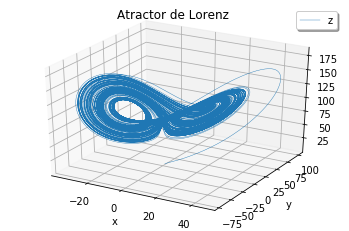

In [137]:
plt.figure().add_subplot(projection='3d')

#plt.plot(*k, lw=0.5)
plt.plot(k[0],k[1],k[2], lw=0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['z'], shadow=True)
plt.title('Atractor de Lorenz ')

plt.show()


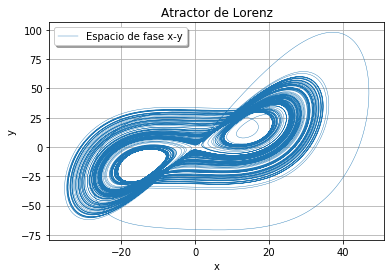

In [139]:
plt.plot(k[0],k[1], lw=0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Espacio de fase x-y'], shadow=True)
plt.title('Atractor de Lorenz')
plt.grid()
plt.show()

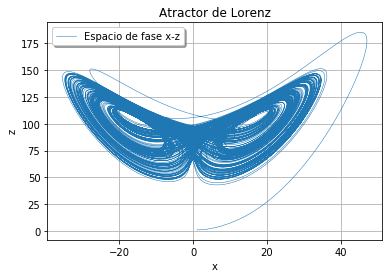

In [142]:
plt.plot(k[0],k[2], lw=0.5)
plt.xlabel('x')
plt.ylabel('z')
plt.legend(['Espacio de fase x-z'], shadow=True)
plt.title('Atractor de Lorenz')
plt.grid()
plt.show()

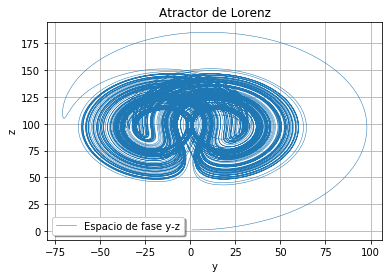

In [141]:
plt.plot(k[1],k[2], lw=0.5)
plt.xlabel('y')
plt.ylabel('z')
plt.legend(['Espacio de fase y-z'],  loc=0, shadow=True)
plt.title('Atractor de Lorenz')
plt.grid()
plt.show()